# Projet 4 : Segmentez des clients d'un site e-commerce

Pour ce projet on dispose de données des utilisateurs du site de e-commerce OLIST. Le but de ce projet est de proposer une segmentation des clients qui pourra être utilisée par l'équipe marketing à des fins de communication. D'un point de vue machine learning l'objectif est d'utiliser un algorithme non supervisé afin de faire des groupes de clients. Il faut pouvoir évaluer cette segmentation avec des indicateurs. Il faut également que cette segmentation soit utilisable par l'équipe de marketing. 

Les données sont stockées sur kaggle : https://www.kaggle.com/olistbr/brazilian-ecommerce

## Notebook 1 : Analyse exploratoire

* Assemblage des données des fichiers
* Pré-visualisation des valeurs manquantes
* Nettoyage des données
* Remplissage des valeurs manquantes
* Analyse exploratoire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork',context='notebook',ticks=True,grid=False)
# jt -r 
# jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

## Assemblage des données des fichiers

On dispose de plusieurs fichiers de données sur les clients. On va passer en revue chaque fichier pour voir ce qu'ils apportent.

### customers_dataset

In [3]:
df_customers_dataset = pd.read_csv('data/olist_customers_dataset.csv', sep=',')

In [4]:
df_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### geolocation

In [5]:
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv', sep=',')

In [6]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### order_items

In [7]:
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv', sep=',')

In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### order_payments

In [9]:
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv', sep=',')

In [10]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### order_reviews

In [11]:
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv', sep=',')

In [12]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### orders_dataset

In [13]:
df_orders_dataset = pd.read_csv('data/olist_orders_dataset.csv', sep=',')

In [14]:
df_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### products_dataset

In [15]:
df_products_dataset = pd.read_csv('data/olist_products_dataset.csv', sep=',')

In [16]:
df_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### sellers_dataset

In [17]:
df_sellers_dataset = pd.read_csv('data/olist_sellers_dataset.csv', sep=',')

In [18]:
df_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### product_category_name_translation

In [19]:
df_product_translation = pd.read_csv('data/product_category_name_translation.csv', sep=',')

In [20]:
df_product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Regroupement des dataframes

Plusieurs dataframe possède la variable order_id. On commence par regrouper ces dataframes.

In [21]:
df = pd.merge(df_order_items, df_order_payments, on='order_id', how='outer')
df = pd.merge(df, df_order_reviews, on='order_id', how='outer')
df = pd.merge(df, df_orders_dataset, on='order_id', how='outer')

On fait un merge sur product_id

In [22]:
df = pd.merge(df, df_products_dataset, on='product_id', how='outer')

On fait un merge sur customer_id

In [23]:
df = pd.merge(df, df_customers_dataset, on='customer_id', how='outer')

On fait un merge sur seller_id

In [24]:
df = pd.merge(df, df_sellers_dataset, on='seller_id', how='outer')

On fait un merge sur product_category_name

In [25]:
df = pd.merge(df, df_product_translation, on='product_category_name', how='outer')

On possède maintenant un dataframe comprenant tous les fichiers excepté les données de géolocalisation car elles ont été anonymisées. On peut maintenant s'intéresser au trous de données.

<AxesSubplot:>

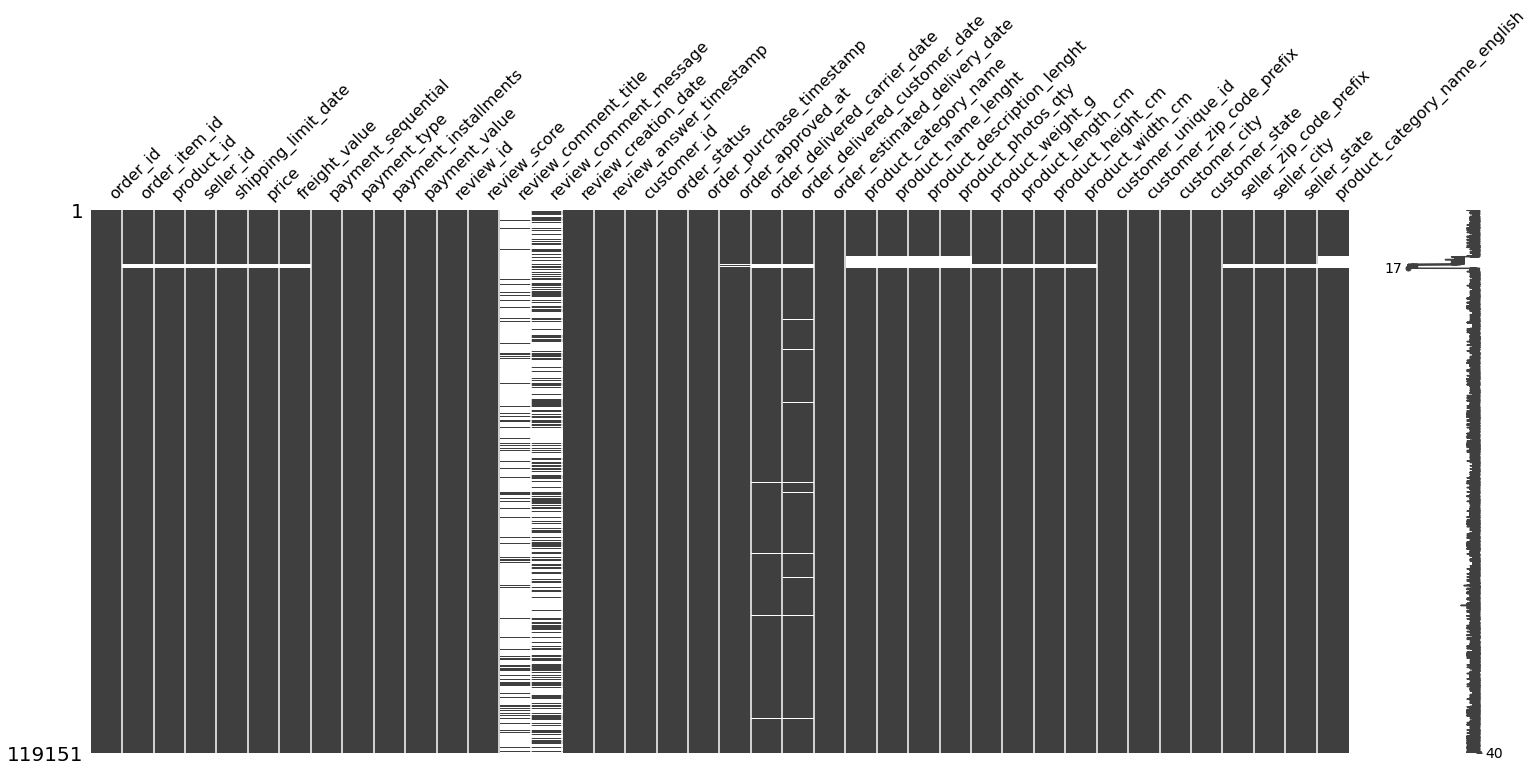

In [26]:
msno.matrix(df) 

Globalement il y a peu de variables avec des trous de données important. Les seules variables ayant des trous de données important sont les variables :
* review_comment_title
* review_comment_message

Cela semble cohérent car tous les clients ne laissent pas forcément de commentaire lorsqu'ils achètent un produit. On va remplacer les valeurs manquantes de review_comment_message par un texte vide. Puis on supprime la variable review_comment_title car on ne va pas l'utiliser. Enfin on supprime les lignes avec des trous de données.

In [27]:
df.loc[:,'review_comment_message'] = df.loc[:,'review_comment_message'].fillna('')
df = df.drop(axis='columns', columns='review_comment_title')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 119135
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114050 non-null  object 
 1   order_item_id                  114050 non-null  float64
 2   product_id                     114050 non-null  object 
 3   seller_id                      114050 non-null  object 
 4   shipping_limit_date            114050 non-null  object 
 5   price                          114050 non-null  float64
 6   freight_value                  114050 non-null  float64
 7   payment_sequential             114050 non-null  float64
 8   payment_type                   114050 non-null  object 
 9   payment_installments           114050 non-null  float64
 10  payment_value                  114050 non-null  float64
 11  review_id                      114050 non-null  object 
 12  review_score                  

## Regroupement des données par client

Dans ce jeu de données chaque ligne correspond à un achat. Cependant nous voulons faire une segmentation de clients. Il faut donc obtenir une ligne par client. Pour cela, on va utiliser la variable customer_unique_id.

Nous allons utiliser dans cette étude les variables suivantes :
* Nombre de produit achetés
* Nombre de produits achetés par categorie
* Dépense moyenne
* Dépense totale
* Frais de port moyen
* Frais de port max
* Type de paiement
* Temps de livraison
* Nombre d'achat en semaine
* Nombre d'achat le weekend
* Jour le plus fréquent d'achat
* Heure la plus fréquente d'achat
* Taille de la description moyenne
* Taille des commentaires

doc intéressante : https://realpython.com/pandas-groupby/

On va maintenant travailler sur un dataframe X où chaque ligne correspondra à un client.

In [28]:
X = pd.DataFrame()

### Variables basées sur le type de produit

Tout d'abord visualisons l'ensemble des types de produits présents dans notre dataframe.

In [29]:
pd.set_option('display.max_rows', 200)

In [30]:
df['product_category_name_english'].value_counts()

bed_bath_table                             11815
health_beauty                               9816
sports_leisure                              8790
furniture_decor                             8640
computers_accessories                       7963
housewares                                  7196
watches_gifts                               6075
telephony                                   4605
garden_tools                                4479
auto                                        4301
toys                                        4193
cool_stuff                                  3915
perfumery                                   3508
baby                                        3119
electronics                                 2809
stationery                                  2572
fashion_bags_accessories                    2125
pet_shop                                    2007
office_furniture                            1763
luggage_accessories                         1148
consoles_games      

En s'inspirant des catégories d'un site de e-commerce on propose d'utiliser la liste suivante :
* High-Tech
* Jouets, enfants et bébés
* Cuisine & Maison
* Bricolage, jardin et Animalerie
* Beauté, Santé et Bien-être
* Vêtements, Chaussures et Bijoux
* Sport et Loisirs
* Automobile et Industrie

Il ne reste plus qu'à appliquer la catégorie la plus appropriée pour chaque type de produit.

In [31]:
category_dict = {
    'bed_bath_table'                              : 'Cuisine & Maison',
    'health_beauty'                               : 'Beauté, Santé et Bien-être',
    'sports_leisure'                              : 'Sport et Loisirs',
    'furniture_decor'                             : 'Cuisine & Maison',
    'computers_accessories'                       : 'High-Tech',
    'housewares'                                  : 'Cuisine & Maison',
    'watches_gifts'                               : 'Vêtements, Chaussures et Bijoux',
    'telephony'                                   : 'High-Tech',
    'garden_tools'                                : 'Bricolage, jardin et Animalerie',
    'auto'                                        : 'Automobile et Industrie',
    'toys'                                        : 'Jouets, enfants et bébés',
    'cool_stuff'                                  : 'High-Tech',
    'perfumery'                                   : 'Beauté, Santé et Bien-être',
    'baby'                                        : 'Jouets, enfants et bébés',
    'electronics'                                 : 'High-Tech',
    'stationery'                                  : 'Sport et Loisirs',
    'fashion_bags_accessories'                    : 'Vêtements, Chaussures et Bijoux',
    'pet_shop'                                    : 'Bricolage, jardin et Animalerie',
    'office_furniture'                            : 'Cuisine & Maison',
    'luggage_accessories'                         : 'Vêtements, Chaussures et Bijoux',
    'consoles_games'                              : 'High-Tech',
    'construction_tools_construction'             : 'Bricolage, jardin et Animalerie',
    'home_appliances'                             : 'Cuisine & Maison',
    'musical_instruments'                         : 'Sport et Loisirs',
    'small_appliances'                            : 'Cuisine & Maison',
    'home_construction'                           : 'Bricolage, jardin et Animalerie',
    'books_general_interest'                      : 'Sport et Loisirs',
    'furniture_living_room'                       : 'Cuisine & Maison',
    'food'                                        : 'Cuisine & Maison',
    'home_confort'                                : 'Cuisine & Maison',
    'audio'                                       : 'High-Tech',
    'drinks'                                      : 'Cuisine & Maison',
    'market_place'                                : 'Cuisine & Maison',
    'construction_tools_lights'                   : 'Bricolage, jardin et Animalerie',
    'air_conditioning'                            : 'Cuisine & Maison',
    'kitchen_dining_laundry_garden_furniture'     : 'Cuisine & Maison',
    'food_drink'                                  : 'Cuisine & Maison',
    'fashion_shoes'                               : 'Vêtements, Chaussures et Bijoux',
    'books_technical'                             : 'Sport et Loisirs',
    'industry_commerce_and_business'              : 'Automobile et Industrie',
    'home_appliances_2'                           : 'Cuisine & Maison',
    'fixed_telephony'                             : 'High-Tech',
    'agro_industry_and_commerce'                  : 'Automobile et Industrie',
    'costruction_tools_garden'                    : 'Bricolage, jardin et Animalerie',
    'computers'                                   : 'High-Tech',
    'art'                                         : 'Sport et Loisirs',
    'signaling_and_security'                      : 'Cuisine & Maison',
    'construction_tools_safety'                   : 'Bricolage, jardin et Animalerie',
    'christmas_supplies'                          : 'Cuisine & Maison',
    'fashion_underwear_beach'                     : 'Vêtements, Chaussures et Bijoux',
    'fashion_male_clothing'                       : 'Vêtements, Chaussures et Bijoux',
    'furniture_bedroom'                           : 'Cuisine & Maison',
    'costruction_tools_tools'                     : 'Bricolage, jardin et Animalerie',
    'tablets_printing_image'                      : 'High-Tech',
    'small_appliances_home_oven_and_coffee'       : 'Cuisine & Maison',
    'cine_photo'                                  : 'High-Tech',
    'dvds_blu_ray'                                : 'High-Tech',
    'books_imported'                              : 'Sport et Loisirs',
    'fashio_female_clothing'                      : 'Vêtements, Chaussures et Bijoux',
    'party_supplies'                              : 'Cuisine & Maison',
    'furniture_mattress_and_upholstery'           : 'Cuisine & Maison',
    'music'                                       : 'Sport et Loisirs',
    'diapers_and_hygiene'                         : 'Beauté, Santé et Bien-être',
    'flowers'                                     : 'Bricolage, jardin et Animalerie',
    'home_comfort_2'                              : 'Cuisine & Maison',
    'fashion_sport'                               : 'Vêtements, Chaussures et Bijoux',
    'arts_and_craftmanship'                       : 'Cuisine & Maison',
    'la_cuisine'                                  : 'Cuisine & Maison',
    'cds_dvds_musicals'                           : 'Sport et Loisirs',
    'fashion_childrens_clothes'                   : 'Vêtements, Chaussures et Bijoux',
    'security_and_services'                       : 'Cuisine & Maison'
}


On créé une nouvelle colonne pour notre dataframe où l'on va attribuer la catégorie pour chaque type de produits.

In [32]:
df['category'] = df['product_category_name_english'].apply(lambda x: category_dict[x])

In [33]:
df['category'].value_counts()

Cuisine & Maison                   34947
High-Tech                          21515
Beauté, Santé et Bien-être         13361
Sport et Loisirs                   13187
Vêtements, Chaussures et Bijoux     9982
Bricolage, jardin et Animalerie     8931
Jouets, enfants et bébés            7312
Automobile et Industrie             4815
Name: category, dtype: int64

On constate que toutes les catégories ne sont pas homogènes mais il n'y a pas de catégorie sur-représenté ou sous-représenté.

On va maintenant attribuer pour chaque client le nombre de produit acheté par catégorie.

In [34]:
df_group = df.groupby('customer_unique_id')

In [35]:
X['Nombre achats'] = df_group.size()

In [36]:
X['Maison'] = df_group['category'].apply(lambda x: (x=='Cuisine & Maison').sum()/x.shape[0])
X['High-Tech'] = df_group['category'].apply(lambda x: (x=='High-Tech').sum()/x.shape[0])
X['Bien-être'] = df_group['category'].apply(lambda x: (x=='Beauté, Santé et Bien-être').sum()/x.shape[0])
X['Loisirs'] = df_group['category'].apply(lambda x: (x=='Sport et Loisirs').sum()/x.shape[0])
X['Vêtements'] = df_group['category'].apply(lambda x: (x=='Vêtements, Chaussures et Bijoux').sum()/x.shape[0])
X['Jardin'] = df_group['category'].apply(lambda x: (x=='Bricolage, jardin et Animalerie').sum()/x.shape[0])
X['Jouets'] = df_group['category'].apply(lambda x: (x=='Jouets, enfants et bébés').sum()/x.shape[0])
X['Automobile'] = df_group['category'].apply(lambda x: (x=='Automobile et Industrie').sum()/x.shape[0])

### Variables basées sur le paiement

#### Prix

In [37]:
X['Dépense moyenne'] = df_group['price'].mean()
X['Dépense totale'] = df_group['price'].sum()
X['Frais de port moyen'] = df_group['freight_value'].mean()
X['Frais de port max'] = df_group['freight_value'].max()

#### Type de paiement

In [38]:
df['payment_type'].value_counts()

credit_card    84172
boleto         22182
voucher         6067
debit_card      1629
Name: payment_type, dtype: int64

In [39]:
X['Paiement carte crédit'] = df_group['payment_type'].apply(lambda x: (x=='credit_card').sum()/x.shape[0])
X['Paiement carte débit'] = df_group['payment_type'].apply(lambda x: (x=='debit_card').sum()/x.shape[0])
X['Paiement voucher'] = df_group['payment_type'].apply(lambda x: (x=='voucher').sum()/x.shape[0])
X['Paiement espèces'] = df_group['payment_type'].apply(lambda x: (x=='boleto').sum()/x.shape[0])

### Variables basées sur données temporelles

#### Livraison

In [40]:
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['temps livraison'] = df['shipping_limit_date'] - df['order_purchase_timestamp']
df['temps livraison'] = df['temps livraison'].apply(lambda x:x.days)
df['achat heure'] = df['order_purchase_timestamp'].apply(lambda x:x.hour)
df_group = df.groupby('customer_unique_id')

In [41]:
X['Temps Livraison'] = df_group['temps livraison'].mean()

#### Achat

In [42]:
df['dayofweek'] = df['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
df_group = df.groupby('customer_unique_id')

In [43]:
X['Achat semaine'] = df_group['dayofweek'].apply(lambda x: (x <= 4).sum()/x.shape[0])
X['Achat weekend'] = df_group['dayofweek'].apply(lambda x: (x > 4).sum()/x.shape[0])

In [44]:
X['Achat heure'] = df_group['achat heure'].apply(lambda x:x.mode()[0])
X['Achat jour'] = df_group['dayofweek'].apply(lambda x:x.mode()[0])

### Variables basées sur les produits

In [45]:
X['Taille description'] = df_group['product_description_lenght'].mean()
df['comment_length'] = df['review_comment_message'].apply(lambda x: len(x))
df_group = df.groupby('customer_unique_id')
X['Taille commentaire'] = df_group['comment_length'].mean()

X['Note'] = df_group['review_score'].mean()

In [47]:
X.to_csv('data/X_shape0_full.csv', sep=';', index=False)

## Analyse exploratoire

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92062 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre achats          92062 non-null  int64  
 1   Maison                 92062 non-null  float64
 2   High-Tech              92062 non-null  float64
 3   Bien-être              92062 non-null  float64
 4   Loisirs                92062 non-null  float64
 5   Vêtements              92062 non-null  float64
 6   Jardin                 92062 non-null  float64
 7   Jouets                 92062 non-null  float64
 8   Automobile             92062 non-null  float64
 9   Dépense moyenne        92062 non-null  float64
 10  Dépense totale         92062 non-null  float64
 11  Frais de port moyen    92062 non-null  float64
 12  Frais de port max      92062 non-null  float64
 13  Paiement carte crédit  92062 non-null  float64
 14  P

### données type de produits

On peut s'intéresser dans un premier temps aux types de produits achetés sur le site OLIST.

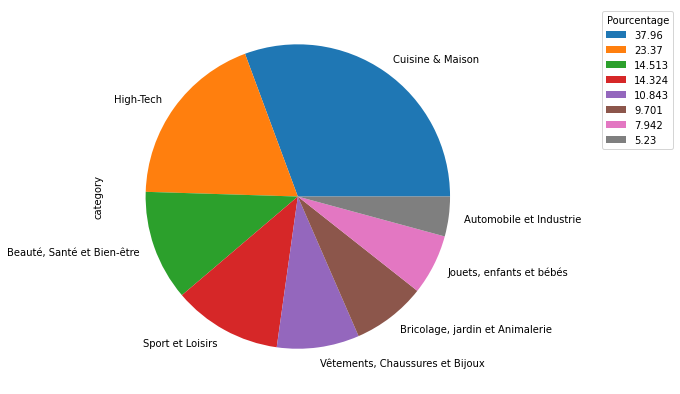

In [47]:
plt.figure(figsize=(7,7))
df['category'].value_counts().plot.pie()
plt.legend(title='Pourcentage', labels = round(df['category'].value_counts()/len(X)*100,3), loc='best', bbox_to_anchor=(1, 1., 0.5, 0.0))

On peut ensuite étudier pour chaque client la part de produit achetés dans chaque catégorie. Pour cela on peut utiliser le dataframe client qui possède la pourcentage de produit achetés par catégorie.

Pour faciliter la visualisation on va simplement différentier 3 cas :
* toujours : Le client achète uniquement dans cette catégorie
* parfois : Le client a déjà acheté dans cette catégorie
* jamais : Le client n'a jamais acheté dans cette catégorie

In [48]:
def translate(df):
    df_copy = df.copy()
    index_test = (0 < df_copy) & (df_copy < 1)
    df_copy[index_test] = 'parfois'
    index_test = df == 0
    df_copy[index_test] = 'jamais'
    index_test = df == 1
    df_copy[index_test] = 'toujours'
    
    return df_copy

In [49]:
df_type_produit = pd.DataFrame(columns=['Catégorie de Produit','Achat dans cette catégorie','Pourcentage'])
categorie_list = ['Maison','High-Tech','Bien-être','Loisirs','Vêtements','Jardin','Jouets','Automobile']
nb_rows = X.shape[0]

for categorie in categorie_list:
    df_temp = translate(X[[categorie]])
    df_temp = df_temp.groupby(categorie).apply(lambda x:x.count()/nb_rows*100)
    data_dict = {'Catégorie de Produit':[categorie]*len(df_temp),
                 'Achat dans cette catégorie':df_temp.index.to_list(),
                 'Pourcentage':df_temp.to_numpy().ravel()}
    df_type_produit = df_type_produit.append(pd.DataFrame(data=data_dict))

<Figure size 1224x720 with 0 Axes>

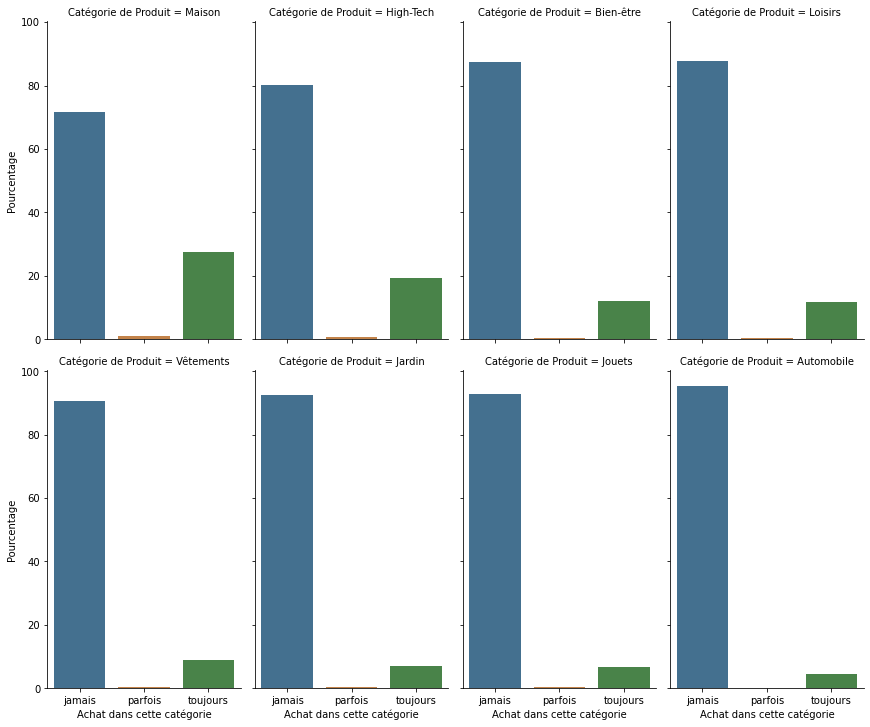

In [50]:
plt.figure(figsize=(17,10))
sns.catplot(x='Achat dans cette catégorie', y='Pourcentage', col='Catégorie de Produit', col_wrap=4,

                data=df_type_produit, saturation=.5,

                kind="bar", ci=None, aspect=.6)

On constate avec ce graphique qu'il y a peu de clients qui achètent dans plusieurs catégories. Cela laisse penser qu'il y a beaucoup de clients qui n'ont acheté qu'une seule fois sur le site. On peut vérifier cela facilement ave le nombre d'achats de chaque client.

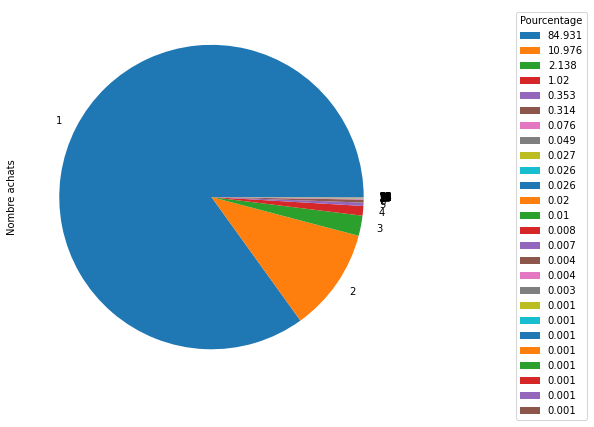

In [51]:
plt.figure(figsize=(17,7))
X['Nombre achats'].value_counts().plot.pie()
plt.legend(title='Pourcentage', labels = round(X['Nombre achats'].value_counts()/len(X)*100,3), loc='best', bbox_to_anchor=(1, 1., 0.5, 0.0))

En effet, la majeur partie des clients ont effectués un seul achat. C'est information est importante et cela signifie que les catégories de produits vont permettre de bien segmenter les clients.

### Variables basées sur le paiement

#### Prix

[Text(0.5, 0, 'Prix')]

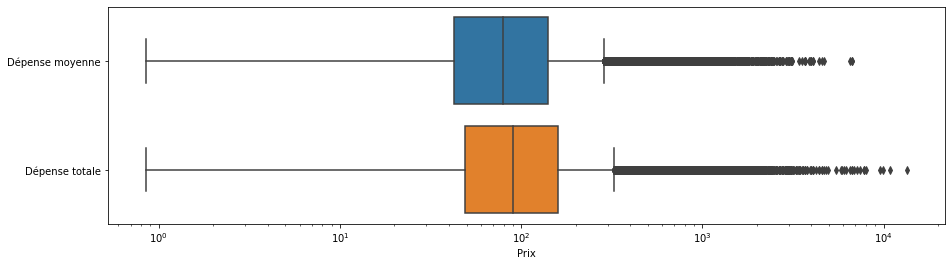

In [52]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=X[['Dépense moyenne','Dépense totale']], orient="h")
g.set_xscale('log')
g.set(xlabel='Prix')

[Text(0.5, 0, 'Prix')]

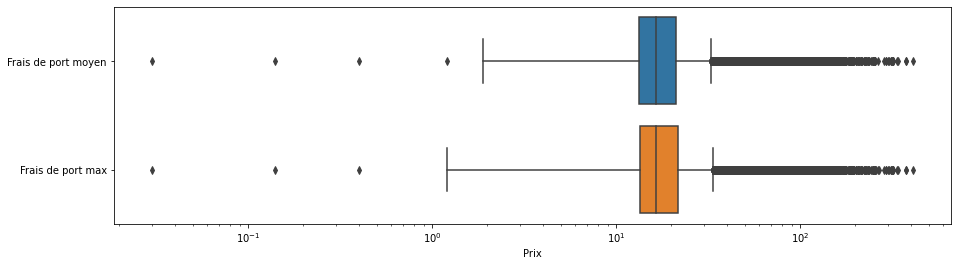

In [53]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=X[['Frais de port moyen','Frais de port max']], orient="h")
g.set_xscale('log')
g.set(xlabel='Prix')

#### Type de paiement

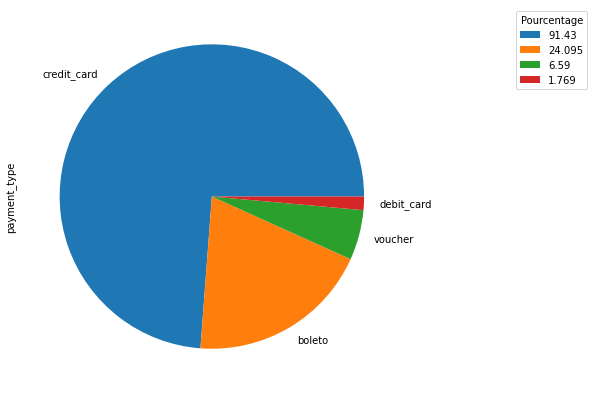

In [54]:
plt.figure(figsize=(7,7))
df['payment_type'].value_counts().plot.pie()
plt.legend(title='Pourcentage', labels = round(df['payment_type'].value_counts()/len(X)*100,3), loc='best', bbox_to_anchor=(1, 1., 0.5, 0.0))

### données temporelles

On disoose de plusieurs données temporelles, celles qui nous intéressent sont :
* moment de l'achat 
* estimation de la livraison

Uniquement avec le moment de l'achat on peut s'intéresser aux habitudes des clients en affichant le jour et l'heure la plus fréquente d'achat. 

In [57]:
df_habitude_achat = pd.DataFrame(columns=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])

In [58]:
data = X.groupby(['Achat jour','Achat heure'])['Nombre achats'].count()
data = data.values.reshape(7,24)

In [59]:
df_habitude_achat = pd.DataFrame(data=data, index=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'], columns=np.arange(0,24) )

<AxesSubplot:>

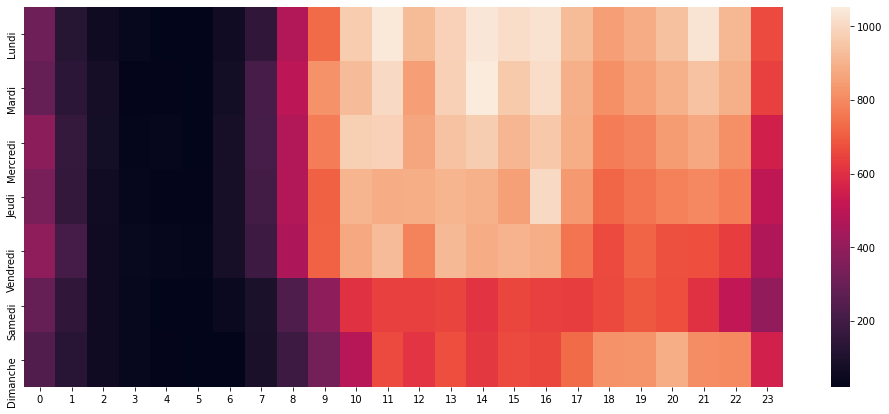

In [60]:
plt.figure(figsize=(17,7))
sns.heatmap(df_habitude_achat)

Ce graphique montre qu'il y a plus d'achats le weekend. Le samedi est la journée avec le plus d'achats. La majorité des achats se font vers 18h. Les achats semblent plus important à midi qui doit correspondre à la pause déjeuner de la majorité des gens. On constate aussi que le vendredi soir il y a autant d'achat que pendant le weekend alors que ce n'est pas le cas pour les autres jour de la semaine. On peut donc apprendre beaucoup de chose avec un timestamp.